# Importing Necessary Libraries

In [142]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
from sklearn.decomposition import PCA
import umap

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/healthcare-diabetes/Healthcare-Diabetes.csv


In [90]:
df = pd.read_csv('/kaggle/input/healthcare-diabetes/Healthcare-Diabetes.csv')
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


# Quality Control

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [92]:
df.isna().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [84]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


<Axes: >

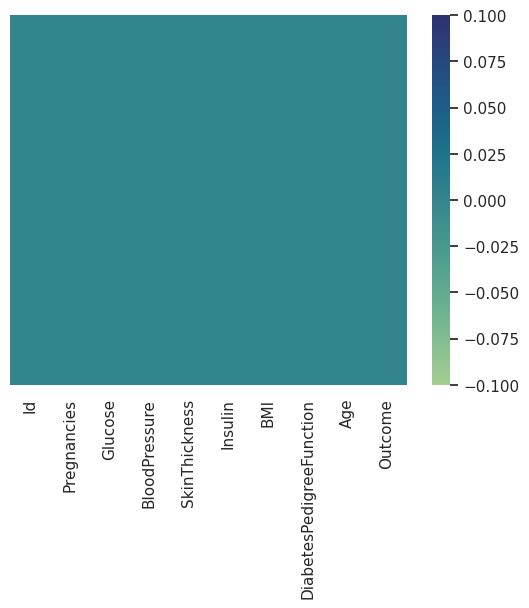

In [93]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='crest')

In [94]:
df.duplicated().sum()

0

In [95]:
df.nunique()

Id                          2768
Pregnancies                   17
Glucose                      136
BloodPressure                 47
SkinThickness                 53
Insulin                      187
BMI                          253
DiabetesPedigreeFunction     523
Age                           52
Outcome                        2
dtype: int64

In [96]:
df.drop('Id',axis=1,inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Limiting Values to Biologically Relevant Range

In [97]:
# Pregnancies: Relevant range 0 to 12
df = df[(df['Pregnancies'] >= 0) & (df['Pregnancies'] <= 12)]

# Glucose: Normal fasting range 70 to 199 mg/dL (anything below 70 is hypoglycemic and abnormal)
df = df[(df['Glucose'] >= 70) & (df['Glucose'] <= 199)]

# Blood Pressure: Normal systolic range 60 to 122 mmHg
df = df[(df['BloodPressure'] >= 60) & (df['BloodPressure'] <= 122)]

# Skin Thickness: Reasonable range 10 to 50 mm
df = df[(df['SkinThickness'] >= 10) & (df['SkinThickness'] <= 50)]

# Insulin: Fasting range 2 to 300 μU/mL (values under 2 likely error or non-fasting)
df = df[(df['Insulin'] >= 2) & (df['Insulin'] <= 300)]

# BMI: Relevant range 15 to 60
df = df[(df['BMI'] >= 15) & (df['BMI'] <= 60)]

# Diabetes Pedigree Function: Relevant range 0 to 2
df = df[(df['DiabetesPedigreeFunction'] >= 0) & (df['DiabetesPedigreeFunction'] <= 2)]

# Age: Relevant range 21 to 81 years
df = df[(df['Age'] >= 21) & (df['Age'] <= 81)]

print(f"Cleaned Data Size: {df.shape}")

Cleaned Data Size: (1017, 9)


In [98]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1017.000000,1017.000000,1017.000000,1017.00000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,3.149459,121.251721,73.960669,29.00000,130.173058,33.140216,0.498441,31.295969,0.319567
std,2.995942,29.448199,9.213053,9.97783,65.292072,6.414024,0.288630,10.293140,0.466538
min,0.000000,71.000000,60.000000,10.00000,18.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,68.000000,21.00000,75.000000,28.900000,0.269000,24.000000,0.000000
50%,2.000000,117.000000,74.000000,29.00000,120.000000,33.300000,0.447000,28.000000,0.000000
75%,5.000000,138.000000,80.000000,37.00000,178.000000,37.000000,0.661000,37.000000,1.000000
max,12.000000,198.000000,110.000000,50.00000,300.000000,57.300000,1.400000,81.000000,1.000000


# EDA

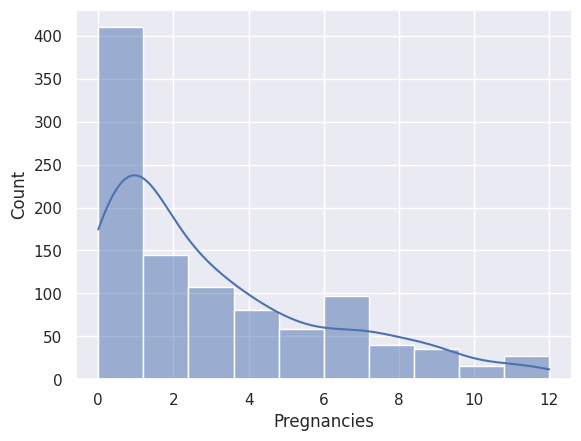

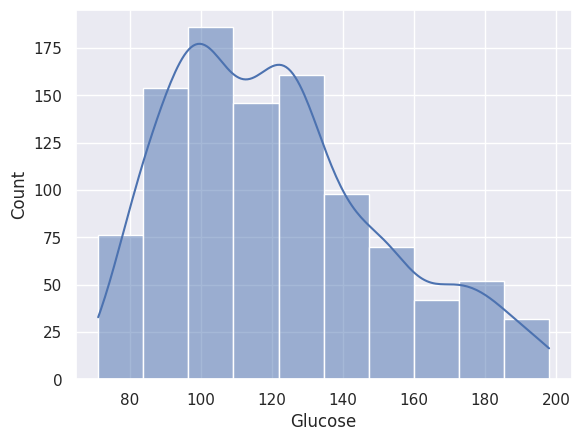

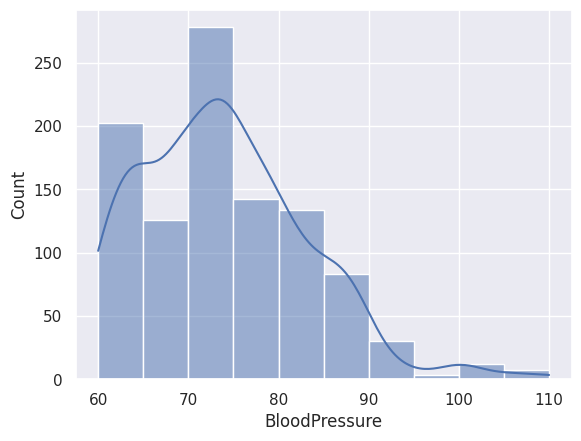

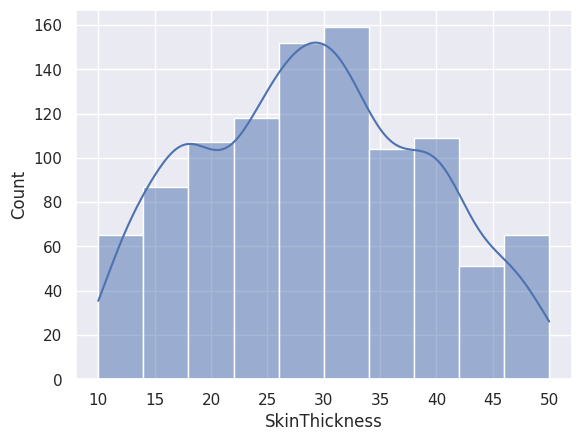

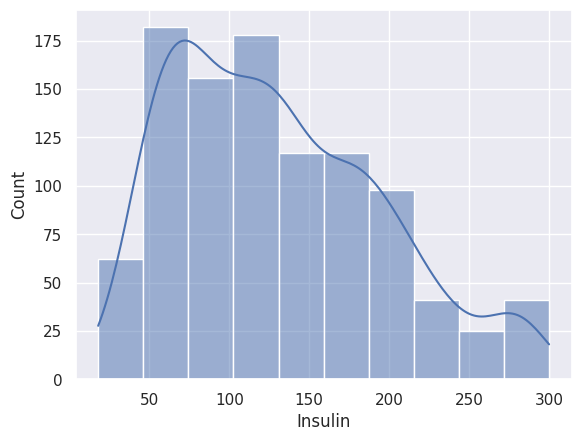

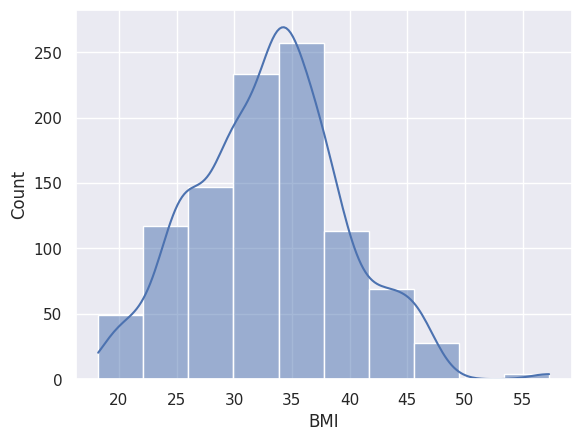

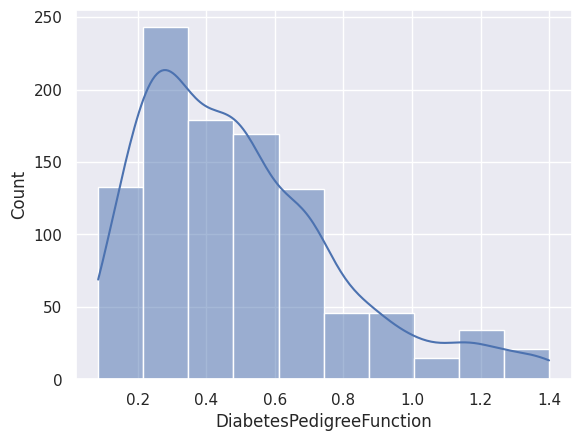

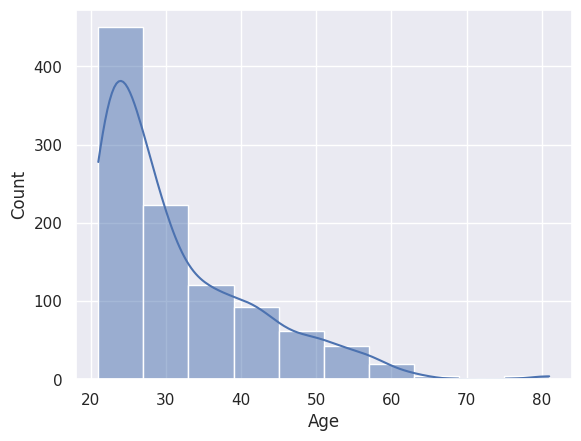

In [99]:
for x in df.drop('Outcome',axis=1).columns:
    sns.histplot(df[x],bins=10,kde=True)
    plt.show()

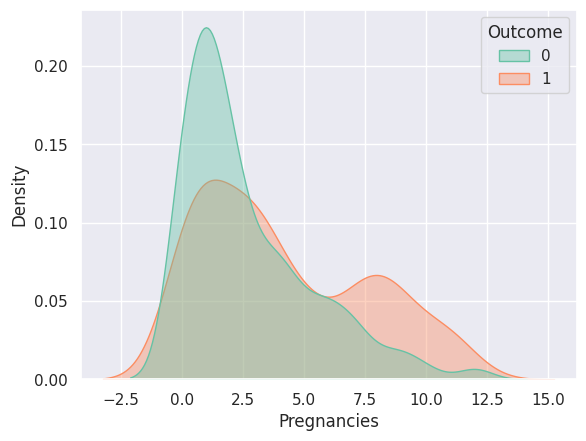

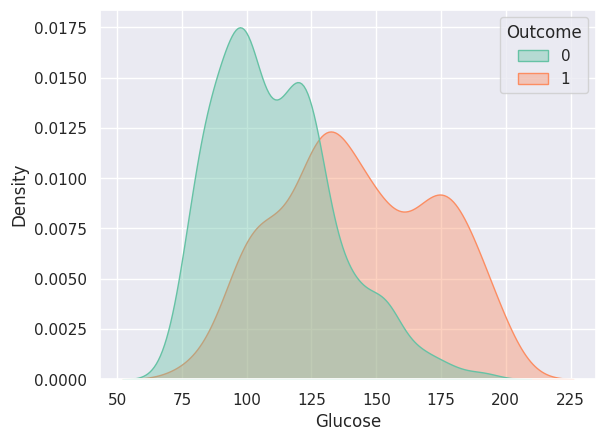

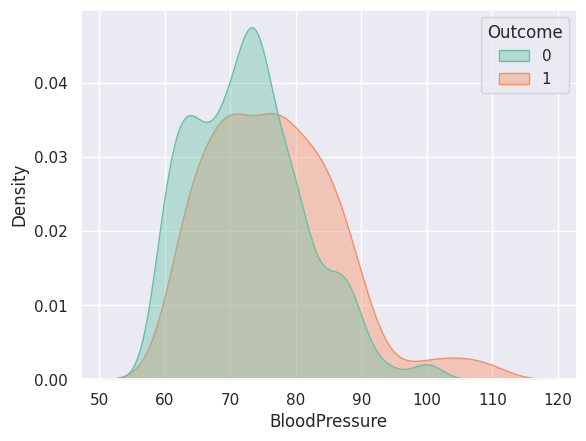

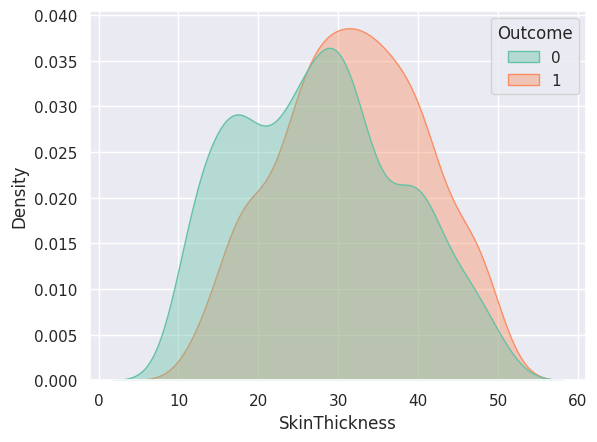

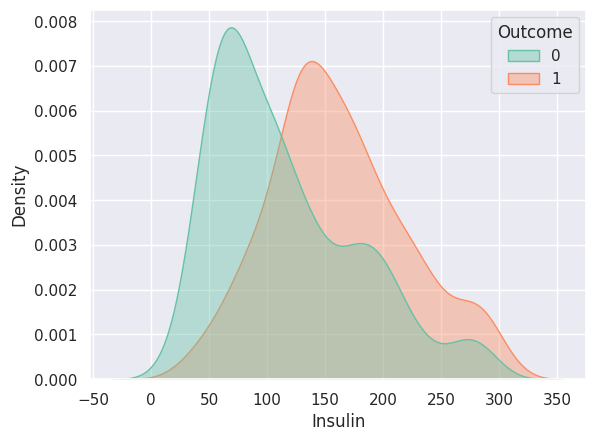

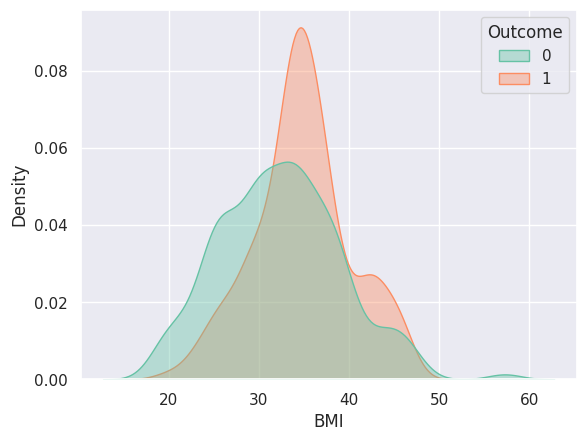

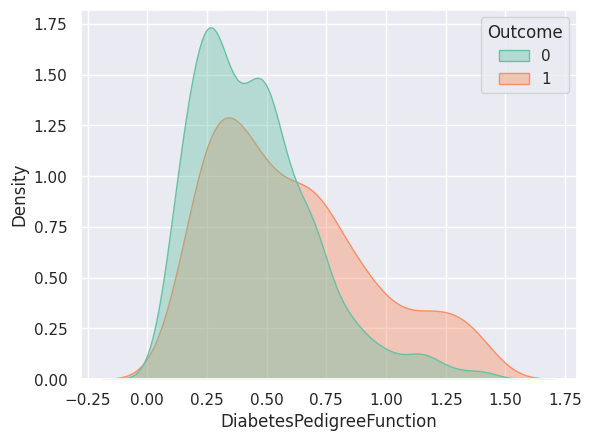

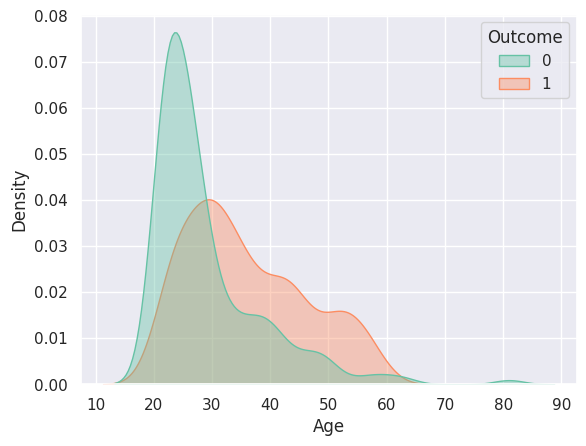

In [100]:
for feature in df.drop('Outcome',axis=1).columns:
    sns.kdeplot(data=df,x=feature,hue='Outcome', fill=True, common_norm=False, alpha=0.4, palette='Set2')
    plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

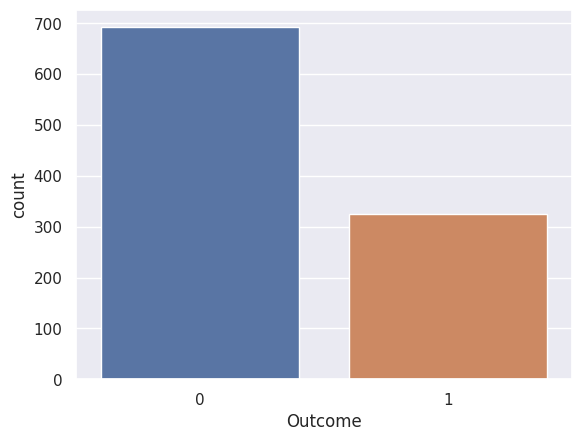

In [101]:
sns.countplot(data=df,x='Outcome')

([<matplotlib.patches.Wedge at 0x78a929a00550>,
 [Text(-0.5906712162810641, 0.9279587890941323, '0'),
  Text(0.5906711293992898, -0.9279588443967586, '1')],
 [Text(-0.32218429978967134, 0.5061593395058903, '68.04'),
  Text(0.32218425239961257, -0.5061593696709592, '31.96')])

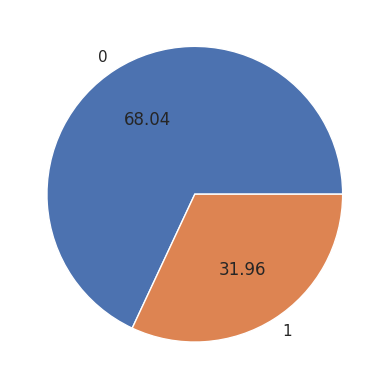

In [102]:
plt.pie(df.groupby(by=["Outcome"]).size(),labels=df['Outcome'].unique(),autopct='%0.2f')

# Correlation Analysis

In [103]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.229825,0.166028,0.157550,0.092923,-0.020248,0.040349,0.649994,0.235497
Glucose,0.229825,1.000000,0.196468,0.125984,0.590227,0.126165,0.059731,0.362708,0.507732
BloodPressure,0.166028,0.196468,1.000000,0.207940,0.132660,0.284194,0.030632,0.243147,0.195507
SkinThickness,0.157550,0.125984,0.207940,1.000000,0.258409,0.609366,0.087501,0.206236,0.193466
Insulin,0.092923,0.590227,0.132660,0.258409,1.000000,0.341825,0.140798,0.237331,0.329215
BMI,-0.020248,0.126165,0.284194,0.609366,0.341825,1.000000,0.130934,0.073116,0.178020
DiabetesPedigreeFunction,0.040349,0.059731,0.030632,0.087501,0.140798,0.130934,1.000000,0.178235,0.250753
Age,0.649994,0.362708,0.243147,0.206236,0.237331,0.073116,0.178235,1.000000,0.312322
Outcome,0.235497,0.507732,0.195507,0.193466,0.329215,0.178020,0.250753,0.312322,1.000000


<Axes: title={'center': 'Correlation Heatmap'}>

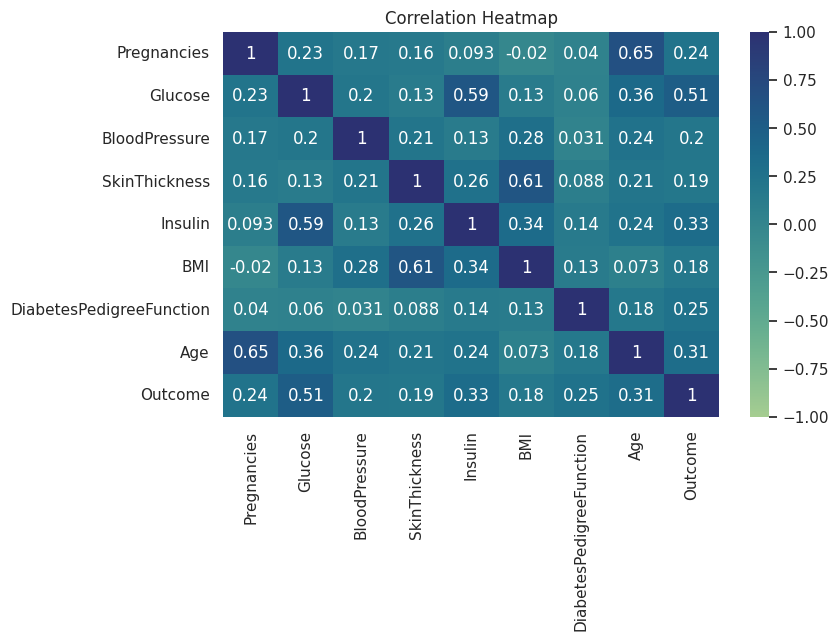

In [104]:
plt.figure(figsize=(8, 5))
plt.title('Correlation Heatmap')
sns.heatmap(data=df.corr(),vmin=-1,vmax=1,cmap='crest',annot=True,center=0)

In [105]:
X = df.drop('Outcome',axis=1)
y = df.Outcome

# Determining Underlying Pattern

## 1.PCA

In [106]:
#Mean Centring is crucial step before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [107]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [109]:
pca.explained_variance_ratio_

array([0.32123646, 0.18551121])

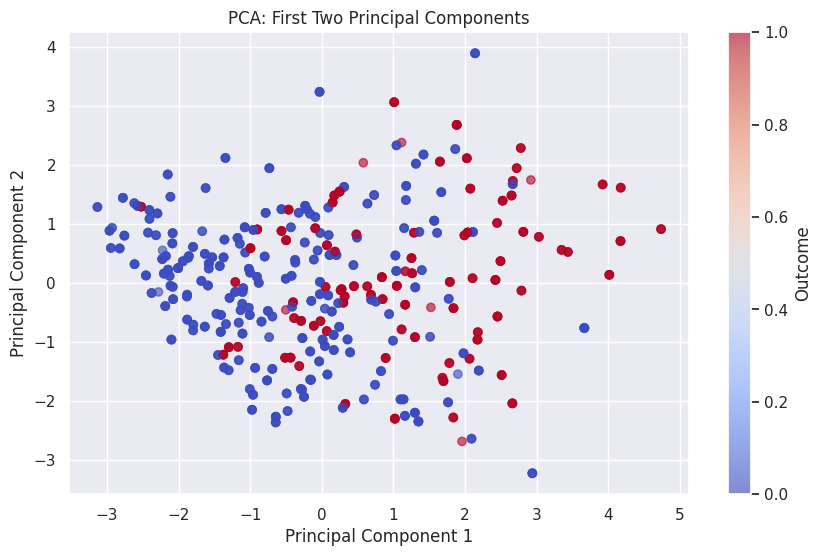

In [110]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

**Based on PCA we can see that the two groups are overlapped and shows non-linear pattern but before drawing a conclusion lets further investigate it with Non-linear dimensionality reduction.**

## 2.UMAP

In [114]:
#Since our features are on different scales so we will use scaled data for UMAP
umap = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap.fit_transform(X_scaled)

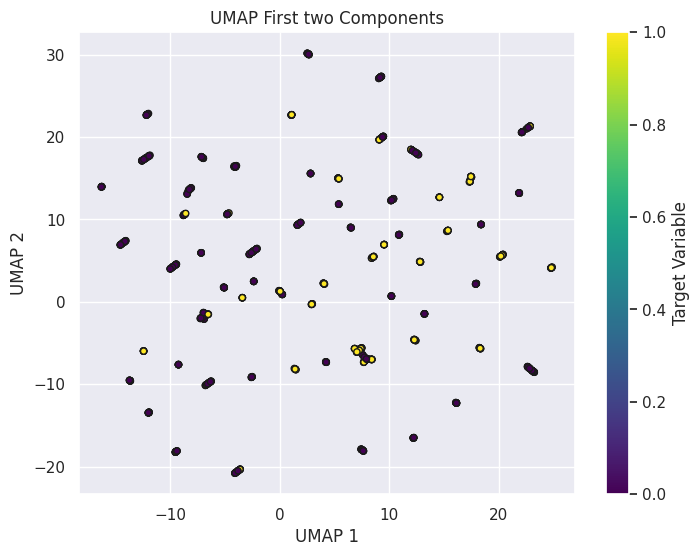

In [115]:
# Visualizing First 2 UMAP components
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', s=20, edgecolor='k')
plt.colorbar(label='Target Variable')
plt.title('UMAP First two Components')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

**Still Non-Linear Pattern, lets cross check it with t-SNE.**

## 3.t-SNE 

In [116]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

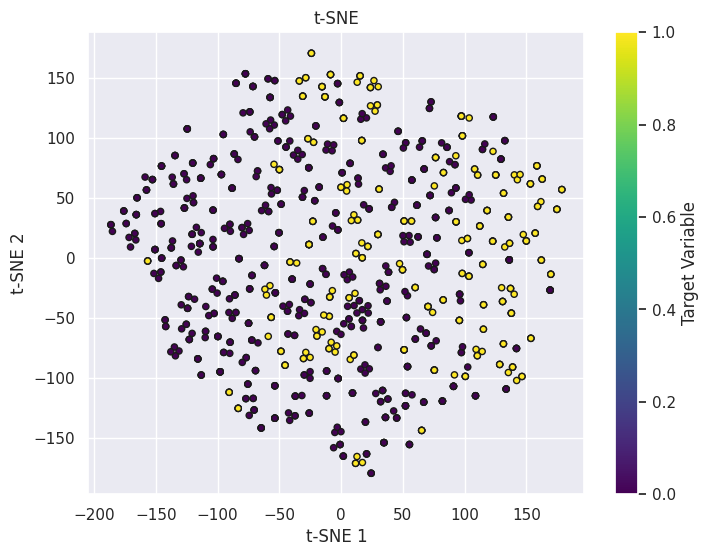

In [118]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=20, edgecolor='k')
plt.colorbar(label='Target Variable')
plt.title('t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

**Still a Non-Linear pattern in data, looks like Random Forest Classifier or Extra Tree Classifier might be the optimum choice for this model, while SVC or Logistic Regression may struggle with this data because data point are not linearly separable.**

# Training the Model

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 1. RandomForestClassifier

In [133]:
RFC_model = RandomForestClassifier(n_estimators=100,random_state=42)
RFC_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [134]:
RFC_model.score(X_train,y_train)

1.0

In [136]:
RFC_y_pred = RFC_model.predict(X_test)

In [144]:
RFC_accuracy =accuracy_score(y_test , RFC_y_pred)
print(classification_report(y_test,RFC_y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       135
           1       1.00      0.94      0.97        69

    accuracy                           0.98       204
   macro avg       0.99      0.97      0.98       204
weighted avg       0.98      0.98      0.98       204



In [145]:
RFC_model.score(X_test,y_test)

0.9803921568627451

## 2. ExtraTreeClassifier

In [146]:
from sklearn.ensemble import ExtraTreesClassifier

In [148]:
ETC_model = ExtraTreesClassifier(random_state=42)
ETC_model.fit(X_train,y_train)

ExtraTreesClassifier(random_state=42)

In [149]:
ETC_model.score(X_train,y_train)

1.0

In [150]:
ETC_model.score(X_test,y_test)

0.9803921568627451

In [151]:
ETC_y_pred = ETC_model.predict(X_test)

In [152]:
ETC_accuracy =accuracy_score(y_test , ETC_y_pred)
print(classification_report(y_test,ETC_y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       135
           1       1.00      0.94      0.97        69

    accuracy                           0.98       204
   macro avg       0.99      0.97      0.98       204
weighted avg       0.98      0.98      0.98       204



## 3. SVC

In [153]:
from sklearn.svm import SVC

In [154]:
SVC_model = SVC(random_state=42)
SVC_model.fit(X_train,y_train)

SVC(random_state=42)

In [155]:
SVC_model.score(X_train,y_train)

0.8856088560885609

In [157]:
SVC_model.score(X_test,y_test)

0.8676470588235294

In [158]:
SVC_y_pred = SVC_model.predict(X_test)

In [159]:
SVC_accuracy =accuracy_score(y_test , SVC_y_pred)
print(classification_report(y_test,SVC_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       135
           1       0.89      0.70      0.78        69

    accuracy                           0.87       204
   macro avg       0.87      0.83      0.84       204
weighted avg       0.87      0.87      0.86       204



**From the accuracy scores we can clearly see that Tree based classifiers worked best for this dataset, while SVC struggles to classify accurately.**